In [65]:
import numpy as np 
import pandas as pd 
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Input,Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/weather-type-classification/weather_classification_data.csv


In [66]:
df=pd.read_csv("/kaggle/input/weather-type-classification/weather_classification_data.csv")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [68]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [69]:
print(df['Location'].unique())
print(df['Cloud Cover'].unique())
print(df['Season'].unique())

['inland' 'mountain' 'coastal']
['partly cloudy' 'clear' 'overcast' 'cloudy']
['Winter' 'Spring' 'Summer' 'Autumn']


**Since these columns are categorical, i try to make dummies for those columns**

In [70]:
df=pd.get_dummies(df,columns=['Location','Cloud Cover','Season'],drop_first=True)

****CREATING INPUT DATA(X) AND TARGET DATA(Y)****

In [71]:
col=list(df.columns)
col.remove('Weather Type')
X=df[col]
y=df['Weather Type']

In [72]:
X.head()
X.astype(int)

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Location_inland,Location_mountain,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter
0,14,73,9,82,1010,2,3,1,0,0,0,1,0,0,1
1,39,96,8,71,1011,7,10,1,0,0,0,1,1,0,0
2,30,64,7,16,1018,5,5,0,1,0,0,0,1,0,0
3,38,83,1,82,1026,7,1,0,0,0,0,0,1,0,0
4,27,74,17,66,990,1,2,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10,74,14,71,1003,1,1,0,1,0,1,0,0,1,0
13196,-1,76,3,23,1067,1,6,0,0,1,0,0,0,0,1
13197,30,77,5,28,1012,3,9,0,0,0,1,0,0,0,0
13198,3,76,10,94,984,0,2,1,0,0,1,0,0,0,1


In [73]:
y.shape

(13200,)

In [74]:
y.unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

**Scaling the input data so that it would be easy for numerical calculations and one hot encoding for solving categorical datas in target data using label encoder**

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
scaler=MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

**MAKING A SEQUENTIAL LAYERS OF INPUT LAYER, HIDDEN LAYER AND OUTPUT LAYER WITH DROPOUT FOR IMPROVING ACCURACY AND TO AVOID OVERFITTING..** 

In [76]:
model=Sequential()
model.add(Input(shape=(15,)))
model.add(Dropout(0.4))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [77]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)             │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164 (656.00 B)

 Trainable params: 164 (656.00 B)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [79]:
history = model.fit(X_train, y_train_encoded, epochs=100, validation_split=0.2, batch_size=64)

Epoch 1/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2881 - loss: 403.6554 - val_accuracy: 0.4186 - val_loss: 121.8555
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2839 - loss: 89.6681 - val_accuracy: 0.4825 - val_loss: 8.3440
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3324 - loss: 12.1908 - val_accuracy: 0.4678 - val_loss: 6.0051
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3500 - loss: 7.5119 - val_accuracy: 0.5497 - val_loss: 3.3421
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3895 - loss: 3.8905 - val_accuracy: 0.7012 - val_loss: 1.0165
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4339 - loss: 1.9887 - val_accuracy: 0.6018 - val_loss: 0.8929
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4560 - loss: 1.5842 - val_accuracy: 0.7476 - val_loss: 0.7567
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4778 - loss: 1.4514 - va

**CHECKING THE MODEL PREDICTION AND STORING IT IN y_prob**

In [80]:
y_prob=model.predict(X_test_scaled)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [81]:
y_pred=y_prob.argmax(axis=1)

In [82]:
accuracy_score(y_test_encoded,y_pred)

0.48787878787878786

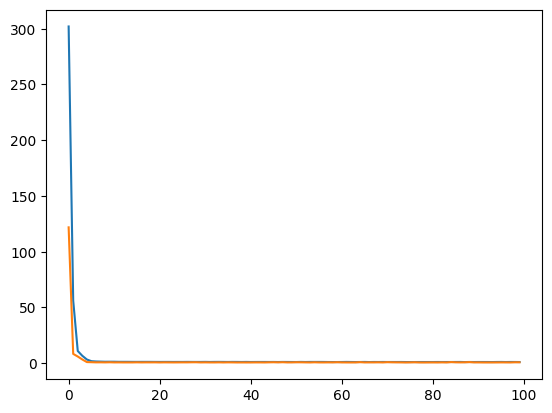

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

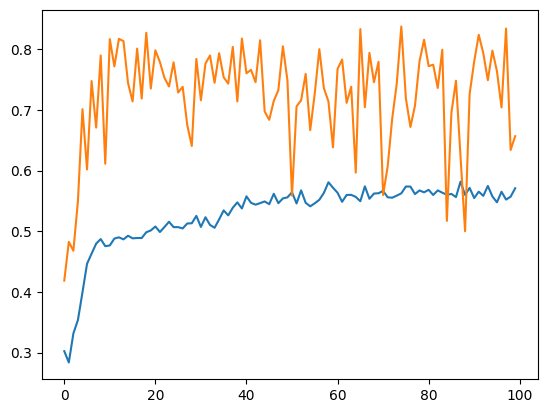

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])